<h1> CMC MSU, 2023, Moscow, 2023
<h2> Fostenko O.A, Buzin N.I, Lopukhov S.A.

![CMC](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGBaPK8xZLBzIyKbV9kcDjI775qGrv_XfEiyGwnnArPQsAh4rYienZNYhnqEDQXkxR4_k&usqp=CAU)

In [2]:
import pandas as pd
import statsmodels as sm
import numpy as np

In [3]:
train_df = pd.read_csv("sample_data/training.csv")
test_df = pd.read_csv("sample_data/testing.csv")

In [4]:
print(test_df.head(3))

         Date    Value
0  1989-01-01  64.6158
1  1989-02-01  64.3268
2  1989-03-01  64.4548


In [5]:
print(train_df.head(3)) # Check. OK

         Date    Value
0  1959-01-01  22.8331
1  1959-02-01  23.2802
2  1959-03-01  23.6156


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<h1> "Moving statistics"

In [55]:
dgreen="#112C0B"

In [178]:
import datetime

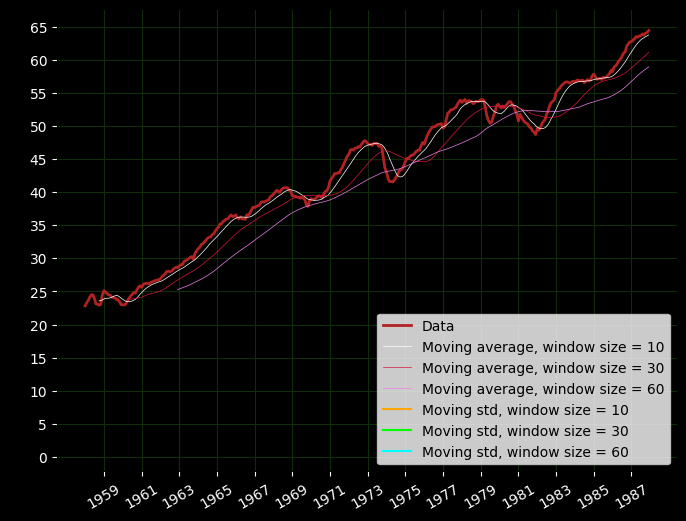

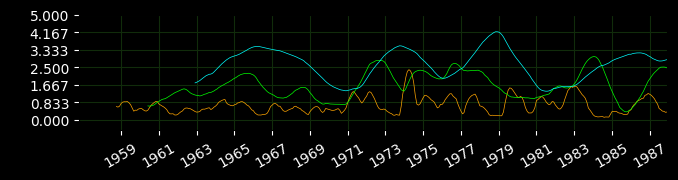

In [272]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

train_dates = train_df.values[:, 0]
train_dates = pd.to_datetime(train_dates)

sns.lineplot(x=train_dates, y=train_df.values[:, 1], label="Data", legend=True, color="firebrick", linewidth=2)

freq = "2Y"
plt.xticks(pd.date_range(train_dates.min(), train_dates.max(), freq=freq),
    [ys.year for ys in pd.date_range(train_dates.min(), train_dates.max(), freq=freq)], rotation=30)
plt.yticks(np.arange(0, 71, step=5))

plt.grid(True, color=dgreen)

window_size1=10  # WINDOW SIZE
rolling_mean = train_df['Value'].rolling(window=window_size1).mean()

sns.lineplot(x=train_dates, y=rolling_mean, label=f"Moving average, window size = {window_size1}", legend=True, color="white", linewidth=0.5)


window_size2=30  # WINDOW SIZE
rolling_mean = train_df['Value'].rolling(window=window_size2).mean()

sns.lineplot(x=train_dates, y=rolling_mean, label=f"Moving average, window size = {window_size2}", legend=True, color="crimson", linewidth=0.5)


window_size3=60  # WINDOW SIZE
rolling_mean = train_df['Value'].rolling(window=window_size3).mean()

sns.lineplot(x=train_dates, y=rolling_mean, label=f"Moving average, window size = {window_size3}", legend=True, color="violet", linewidth=0.5)


dummycolor1 = "orange"  # DUMMY COLORS
dummycolor2 = "lime"
dummycolor3 = "aqua"
line1, = ax.plot(1, 1, label=f"Moving std, window size = {window_size1}", color=dummycolor1) # Dummy plots
line1, = ax.plot(1, 1, label=f"Moving std, window size = {window_size2}", color=dummycolor2)
line1, = ax.plot(1, 1, label=f"Moving std, window size = {window_size3}", color=dummycolor3)

plt.legend()
plt.show()


fig, ax = plt.subplots(figsize=(8, 1.5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
freq = "2Y"
plt.xticks(pd.date_range(train_dates.min(), train_dates.max(), freq=freq),
    [ys.year for ys in pd.date_range(train_dates.min(), train_dates.max(), freq=freq)], rotation=30)

ax.set_ylim(-0.5, 5)
ax.set_xlim(train_dates[0] - datetime.timedelta(450), train_dates[-1])
plt.yticks(np.linspace(0, 5, 7))


plt.subplots_adjust(right=0.86)

rolling_std = train_df['Value'].rolling(window=window_size1).std()
sns.lineplot(x=train_dates, y=rolling_std, legend=True, color=dummycolor1, linewidth=0.5)

rolling_std = train_df['Value'].rolling(window=window_size2).std()
sns.lineplot(x=train_dates, y=rolling_std, legend=True, color=dummycolor2, linewidth=0.5)

rolling_std = train_df['Value'].rolling(window=window_size3).std()
sns.lineplot(x=train_dates, y=rolling_std, legend=True, color=dummycolor3, linewidth=0.5)

plt.grid(True, color=dgreen)

plt.show()

In [237]:
dates = pd.concat([pd.DataFrame(train_dates), pd.DataFrame(test_dates)])
dates = pd.DatetimeIndex(dates[0])

In [241]:
dates

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '1993-03-01', '1993-04-01', '1993-05-01', '1993-06-01',
               '1993-07-01', '1993-08-01', '1993-09-01', '1993-10-01',
               '1993-11-01', '1993-12-01'],
              dtype='datetime64[ns]', name=0, length=420, freq=None)

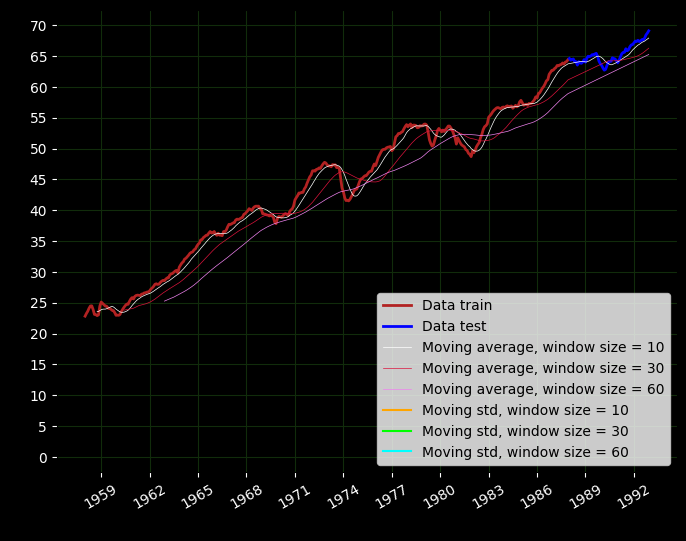

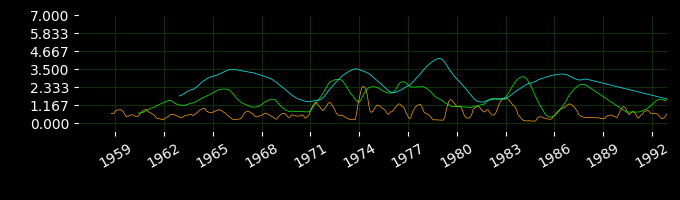

In [285]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

test_dates = test_df.values[:, 0]
test_dates = pd.to_datetime(test_dates)

sns.lineplot(x=train_dates, y=train_df.values[:, 1], label="Data train", legend=True, color="firebrick", linewidth=2)
sns.lineplot(x=test_dates, y=test_df.values[:, 1], label="Data test", legend=True, color="blue", linewidth=2)

freq = "3Y"
plt.xticks(pd.date_range(train_dates.min(), test_dates.max(), freq=freq),
    [ys.year for ys in pd.date_range(train_dates.min(), test_dates.max(), freq=freq)], rotation=30)
plt.yticks(np.arange(0, 71, step=5))

plt.grid(True, color=dgreen)


window_size1=10  # WINDOW SIZE
window_size2=30  # WINDOW SIZE
window_size3=60  # WINDOW SIZE

rolling_mean_train = train_df['Value'].rolling(window=window_size1).mean()
rolling_mean_test = test_df['Value'].rolling(window=window_size1).mean()
rolling_mean = pd.concat([rolling_mean_train, rolling_mean_test])

rolling_mean.index = np.arange(0, len(rolling_mean))  # Reindexing
rolling_std.index = np.arange(0, len(rolling_std))  # Reindexing

sns.lineplot(x=dates, y=rolling_mean,
             label=f"Moving average, window size = {window_size1}", legend=True, color="white", linewidth=0.5)


rolling_mean_train = train_df['Value'].rolling(window=window_size2).mean()
rolling_mean_test = test_df['Value'].rolling(window=window_size2).mean()
rolling_mean = pd.concat([rolling_mean_train, rolling_mean_test])

rolling_mean.index = np.arange(0, len(rolling_mean))  # Reindexing

sns.lineplot(x=dates, y=rolling_mean,
             label=f"Moving average, window size = {window_size2}", legend=True, color="crimson", linewidth=0.5)


rolling_mean_train = train_df['Value'].rolling(window=window_size3).mean()
rolling_mean_test = test_df['Value'].rolling(window=window_size3).mean()
rolling_mean = pd.concat([rolling_mean_train, rolling_mean_test])

rolling_mean.index = np.arange(0, len(rolling_mean))  # Reindexing

sns.lineplot(x=dates, y=rolling_mean,
             label=f"Moving average, window size = {window_size3}", legend=True, color="violet", linewidth=0.5)


dummycolor1 = "orange"
dummycolor2 = "lime"
dummycolor3 = "aqua"
line1, = ax.plot(1, 1, label=f"Moving std, window size = {window_size1}", color=dummycolor1) # Dummy plot
line1, = ax.plot(1, 1, label=f"Moving std, window size = {window_size2}", color=dummycolor2) # Dummy plot
line1, = ax.plot(1, 1, label=f"Moving std, window size = {window_size3}", color=dummycolor3) # Dummy plot

plt.legend()

fig, ax = plt.subplots(figsize=(8, 1.5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

freq = "3Y"
plt.xticks(pd.date_range(train_dates.min(), test_dates.max(), freq=freq),
    [ys.year for ys in pd.date_range(train_dates.min(), test_dates.max(), freq=freq)], rotation=30)

ax.set_ylim(-0.5, 6)
ax.set_xlim(train_dates[0] - datetime.timedelta(450), test_dates[-1])
plt.yticks(np.linspace(0, 7, 7))

plt.subplots_adjust(right=0.86)

rolling_std_train = train_df['Value'].rolling(window=window_size1).std()
rolling_std_test = test_df['Value'].rolling(window=window_size1).std()
rolling_std = pd.concat([rolling_std_train, rolling_std_test])
rolling_std.index = np.arange(0, len(rolling_std))  # Reindexing
sns.lineplot(x=dates, y=rolling_std, legend=True, color=dummycolor1, linewidth=0.5)

rolling_std_train = train_df['Value'].rolling(window=window_size2).std()
rolling_std_test = test_df['Value'].rolling(window=window_size2).std()
rolling_std = pd.concat([rolling_std_train, rolling_std_test])
rolling_std.index = np.arange(0, len(rolling_std))  # Reindexing
sns.lineplot(x=dates, y=rolling_std, legend=True, color=dummycolor2, linewidth=0.5)

rolling_std_train = train_df['Value'].rolling(window=window_size3).std()
rolling_std_test = test_df['Value'].rolling(window=window_size3).std()
rolling_std = pd.concat([rolling_std_train, rolling_std_test])
rolling_std.index = np.arange(0, len(rolling_std))  # Reindexing
sns.lineplot(x=dates, y=rolling_std, legend=True, color=dummycolor3, linewidth=0.5)
plt.grid(True, color=dgreen)

plt.show()

<h1> "Дики-Фуллер"

In [294]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [301]:
from statsmodels.tsa.stattools import adfuller  # Dickey-Fuller
result = adfuller(train_df['Value'])
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

ADF статистика: -0.2533911799284611
p-value: 0.9318510422993468
Критические значения: {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Интерпретация результатов:
p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен


Видим, что p-value достаточно высокое. Это значит, что предположение о существовании т.н. "единичного корня" скорее верное, и это указывает на **нестационарность** временного ряда.

<h1> "Сезонность"

In [309]:
indexed = train_df.set_index()

In [310]:
indexed

,Value
Date,
1959-01-01,22.8331
1959-02-01,23.2802
1959-03-01,23.6156
1959-04-01,24.1186
1959-05-01,24.4820
...,...
1988-08-01,63.8851
1988-09-01,63.7040
1988-10-01,64.0220


Аддитивная модель:

<ipython-input-350-6a9e990196f5>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fig = plt.subplot(411)


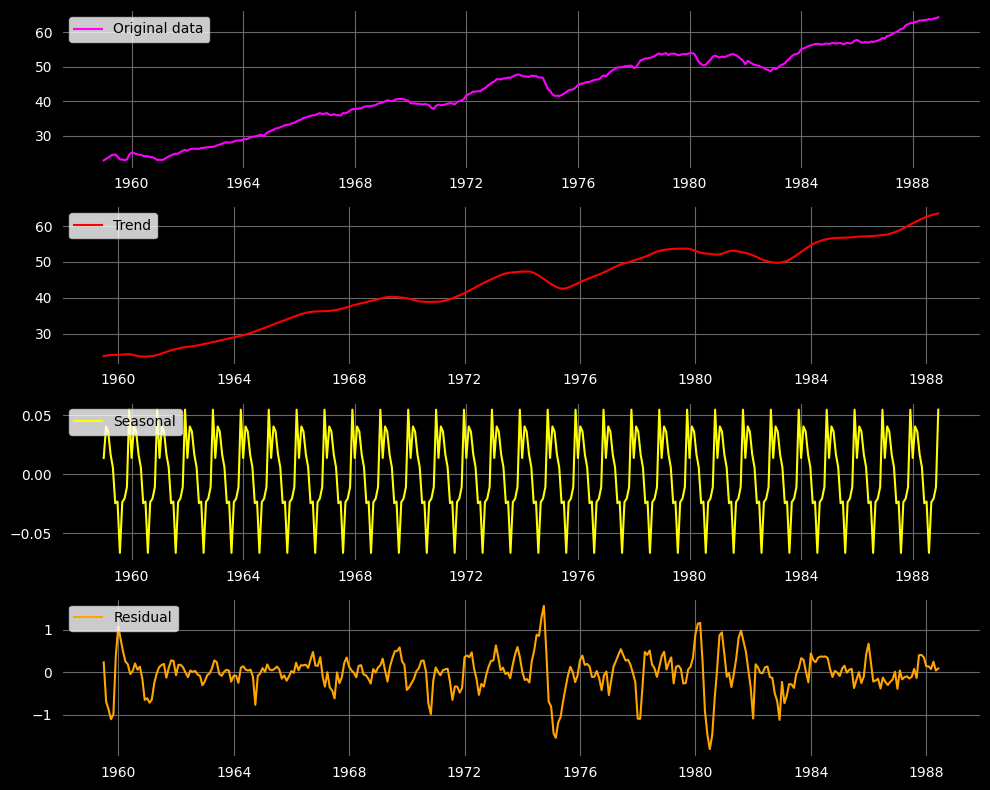

In [350]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Визуализация компонент
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

fig = plt.subplot(411)
fig.patch.set_facecolor('black')
plt.plot(indexed, label='Original data', color="magenta")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

fig = plt.subplot(412)
fig.patch.set_facecolor('black')
plt.plot(trend, label='Trend', color="red")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

fig = plt.subplot(413)
fig.patch.set_facecolor('black')
plt.plot(seasonal, label='Seasonal', color="yellow")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

fig = plt.subplot(414)
fig.patch.set_facecolor('black')
plt.plot(residual, label='Residual', color="orange")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

А теперь оценим стационарность полученных компонент:

In [340]:
print('КОМПОНЕНТА "ТРЕНД"\n')
result = adfuller(trend.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

КОМПОНЕНТА "ТРЕНД"

ADF статистика: -0.8615760333584023
p-value: 0.8003625761532233
Критические значения: {'1%': -3.4503224123605194, '5%': -2.870338478726661, '10%': -2.571457612488522}
Интерпретация результатов:
p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен


In [341]:
print('КОМПОНЕНТА "СЕЗОННОСТЬ"\n')
result = adfuller(seasonal.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

КОМПОНЕНТА "СЕЗОННОСТЬ"

ADF статистика: -540389567101099.7
p-value: 0.0
Критические значения: {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}
Интерпретация результатов:
p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен


In [343]:
print('КОМПОНЕНТА "ОСТАТОК"\n')
result = adfuller(residual.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

КОМПОНЕНТА "ОСТАТОК"

ADF статистика: -7.485563833765426
p-value: 4.649096674694056e-11
Критические значения: {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
Интерпретация результатов:
p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен


<h4> Выводы: <br>
"Сезонность" полностью СТАЦИОНАРНА. <br>
"Тренд" с высокой вероятностью НЕСТАЦИОНАРЕН. <br>
"Остаток" СТАЦИОНАРЕН. <br> <br>

<h4> Сезонность очевидна. У приведенного временного ряда данные подвержены сезонным колебаниям, цикличны. Продолжительность цикла - 1 год <h4>
Компонента "остаток" кажется не имеющей каких-то закономерностей.

Теперь мультипликативная модель:

<ipython-input-363-d9305db0886d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fig = plt.subplot(411)


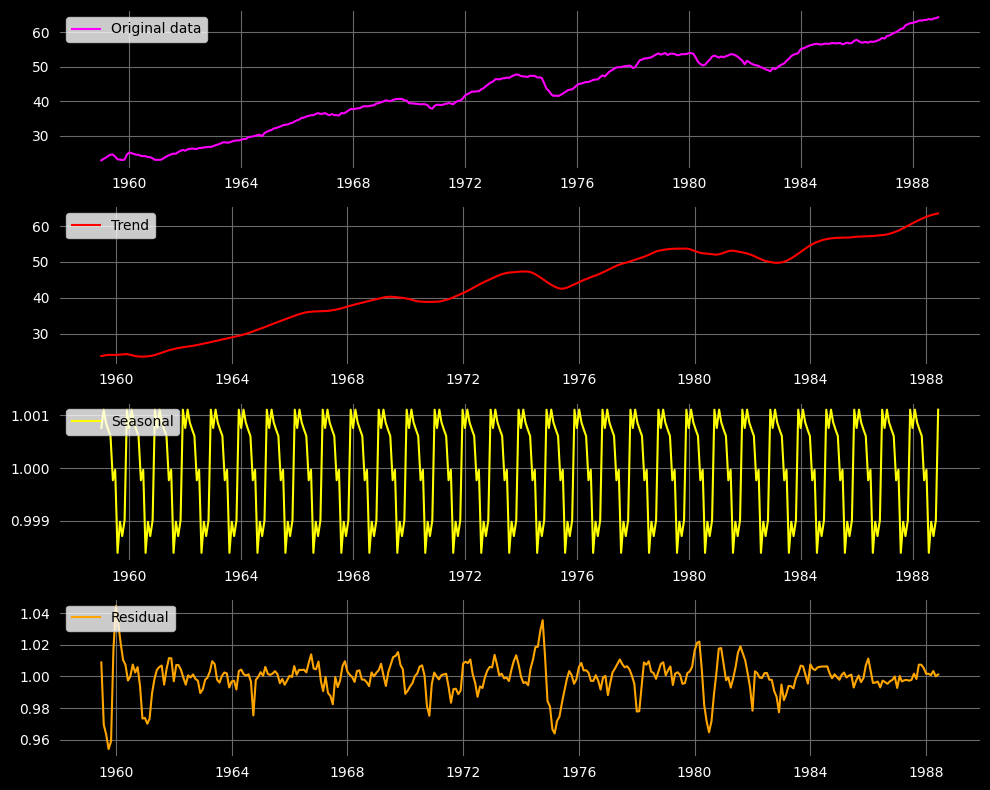

In [363]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Визуализация компонент
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

fig = plt.subplot(411)
fig.patch.set_facecolor('black')
plt.plot(indexed, label='Original data', color="magenta")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

fig = plt.subplot(412)
fig.patch.set_facecolor('black')
plt.plot(trend, label='Trend', color="red")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

fig = plt.subplot(413)
fig.patch.set_facecolor('black')
plt.plot(seasonal, label='Seasonal', color="yellow")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

fig = plt.subplot(414)
fig.patch.set_facecolor('black')
plt.plot(residual, label='Residual', color="orange")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [364]:
print('КОМПОНЕНТА "ТРЕНД"\n')
result = adfuller(trend.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

КОМПОНЕНТА "ТРЕНД"

ADF статистика: -0.8615760333584023
p-value: 0.8003625761532233
Критические значения: {'1%': -3.4503224123605194, '5%': -2.870338478726661, '10%': -2.571457612488522}
Интерпретация результатов:
p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен


In [365]:
print('КОМПОНЕНТА "СЕЗОННОСТЬ"\n')
result = adfuller(seasonal.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

КОМПОНЕНТА "СЕЗОННОСТЬ"

ADF статистика: -39820684499748.516
p-value: 0.0
Критические значения: {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
Интерпретация результатов:
p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен


In [366]:
print('КОМПОНЕНТА "ОСТАТОК"\n')
result = adfuller(residual.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

КОМПОНЕНТА "ОСТАТОК"

ADF статистика: -7.466083739785173
p-value: 5.200193898326747e-11
Критические значения: {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
Интерпретация результатов:
p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен


"Остаток" и "Сезонность" стационарны. <br>
"Тренд" нестационарен. <br>

<h1> "Интегрированность"

In [397]:
newindexed = indexed.diff()  # ДИФФЕРЕНЦИРУЕМ 1й РАЗ

In [398]:
decomposition = seasonal_decompose(newindexed.dropna(), model='multiplicative')

ValueError: ignored

Ага, мультипликативная модель тут не подойдет. Используем аддитивную

<ipython-input-399-896090751188>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fig = plt.subplot(411)


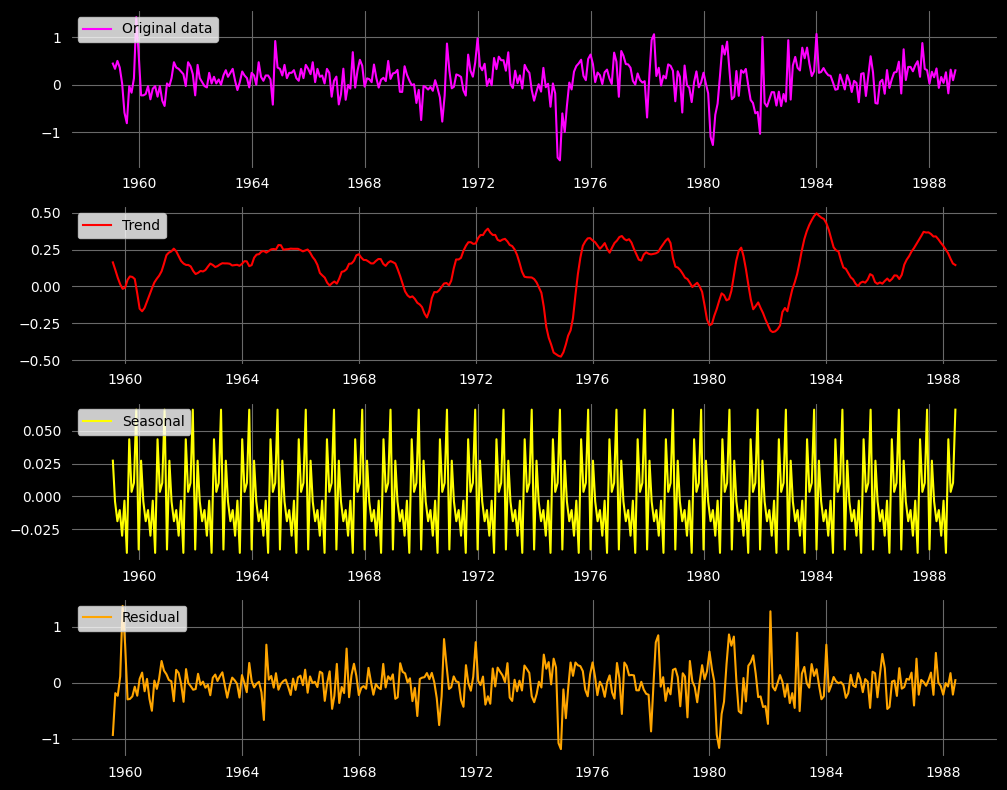

In [399]:
decomposition = seasonal_decompose(newindexed.dropna(), model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Визуализация компонент
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

fig = plt.subplot(411)
fig.patch.set_facecolor('black')
plt.plot(newindexed, label='Original data', color="magenta")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

fig = plt.subplot(412)
fig.patch.set_facecolor('black')
plt.plot(trend, label='Trend', color="red")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

fig = plt.subplot(413)
fig.patch.set_facecolor('black')
plt.plot(seasonal, label='Seasonal', color="yellow")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

fig = plt.subplot(414)
fig.patch.set_facecolor('black')
plt.plot(residual, label='Residual', color="orange")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(color="dimgrey")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<h3> Весьма занимательно. Анализируя изменение значений в течение месяца, получили нечто иное, но снова имеющее очевидную сезонность в один год.

In [400]:
print('КОМПОНЕНТА "ТРЕНД"\n')
result = adfuller(trend.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

print("\n")

print('КОМПОНЕНТА "СЕЗОННОСТЬ"\n')
result = adfuller(seasonal.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

print("\n")

print('КОМПОНЕНТА "ОСТАТОК"\n')
result = adfuller(residual.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

КОМПОНЕНТА "ТРЕНД"

ADF статистика: -4.642645445134946
p-value: 0.00010770437100123455
Критические значения: {'1%': -3.4503836022181056, '5%': -2.8703653471616826, '10%': -2.571471939191249}
Интерпретация результатов:
p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен


КОМПОНЕНТА "СЕЗОННОСТЬ"

ADF статистика: -490251657218254.0
p-value: 0.0
Критические значения: {'1%': -3.4493918438232525, '5%': -2.8699298018856574, '10%': -2.5712397066390458}
Интерпретация результатов:
p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен


КОМПОНЕНТА "ОСТАТОК"

ADF статистика: -8.186262948202327
p-value: 7.88470859521852e-13
Критические значения: {'1%': -3.4503224123605194, '5%': -2.870338478726661, '10%': -2.571457612488522}
Интерпретация результатов:
p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен


Все компоненты СТАЦИОНАРНЫ с крайне высокой достоверностью

In [402]:
result = adfuller(newindexed.dropna())
print('ADF статистика:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
print('Интерпретация результатов:')
if result[1] < 0.05:
    print('p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен')
else:
    print('p-value больше 0.05, нулевая гипотеза не отвергается, ряд нестационарен')

ADF статистика: -7.3673114952119825
p-value: 9.164149561098284e-11
Критические значения: {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Интерпретация результатов:
p-value меньше 0.05, отвергаем нулевую гипотезу, ряд стационарен


<h3> Вывод: продифференцировали ряд 1 раз, и ряд стал стационарным. Значит, он является интегрированным порядка k=1

<h1> "ARIMA"

$ARIMA(p, d, q)$ имеет 3 параметра: <br>
$p$ отвечает за зависимость текущего значения от так называемых "лагов" - предыдущих значений ряда. <br>
$q$ отвечает за учитываемое число ошибок прогнозирования. <br>
$d$ отвечает за порядок интегрированности ряда. У нас это d=1, как было выяснено выше <br>

Подберем значения p и q:

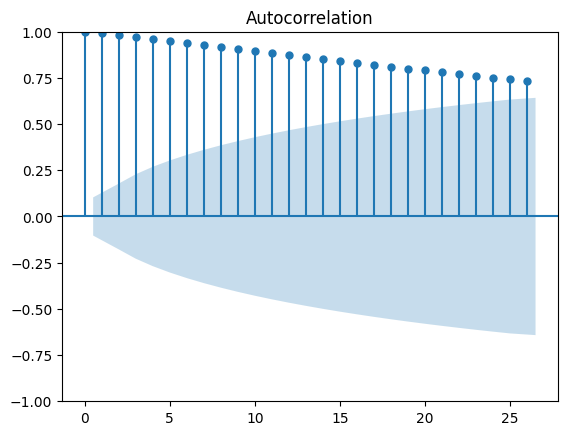

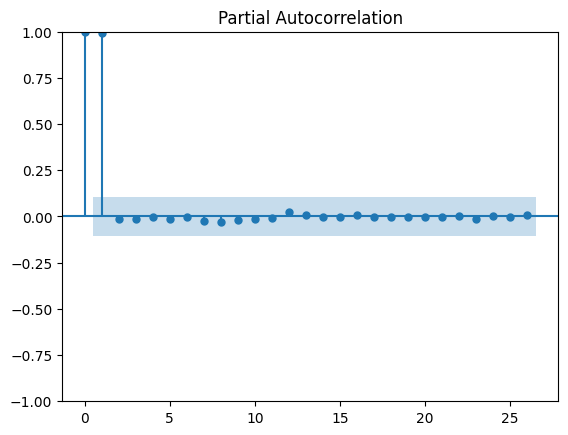

In [403]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(indexed.dropna())
plot_pacf(indexed.dropna())
plt.show()

Видно сильное отличие "пиков" от "не-пиков". Переберем "пиковые" значения в попытке получить наилучшую модель. Каждый из "пиков" статистически значим.

In [421]:
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

In [575]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
order_of_integration = 1
params = [(p, order_of_integration, q) for p in range(3) for q in range(25)]
av_scores = []

n_splits = 3  # "FOLDS"
for param_tuple in params:
    r2scores = []
    tscv = TimeSeriesSplit(n_splits=n_splits)
    for train_index, test_index in tscv.split(indexed):
        X_train, X_test = indexed.index[train_index], indexed.index[test_index]
        y_train, y_test = indexed.iloc[train_index], indexed.iloc[test_index]
        y_train.index.freq = "MS"
        y_test.index.freq = "MS"

        model = ARIMA(y_train, order=param_tuple).fit()
        y_pred = model.predict(start=X_test[0], end=X_test[-1])
        r2scores.append(r2_score(y_true=y_test, y_pred=y_pred))
    av_scores.append(np.mean(np.array(r2scores)))

In [502]:
print(av_scores.index(max(av_scores)))

34


In [663]:
order_of_integration = 1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


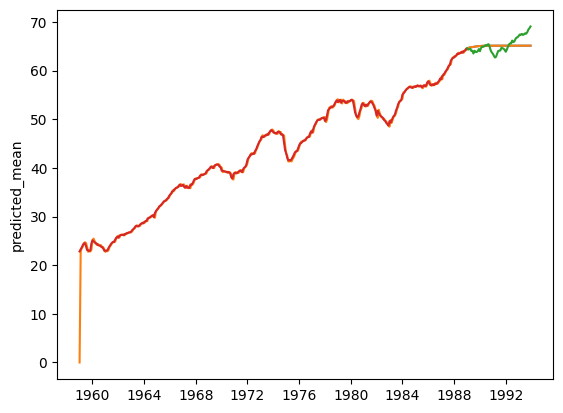

In [667]:
model = ARIMA(indexed, order=params[av_scores.index(max(av_scores))]).fit()
y_pred = model.predict(start=test_dates[0], end=test_dates[-1])
sns.lineplot(y_pred)
sns.lineplot(model.predict(start=dates[0], end=dates[-1]))
plt.plot(test_df['Date'], test_df['Value'])
plt.plot(train_df['Date'], train_df['Value'])

In [668]:
params[34]

(1, 1, 9)

In [669]:
av_scores[35]

0.0051070481848842775

In [670]:
params = [(p, order_of_integration, q) for p in range(3) for q in range(25)]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-1.0162906349114484


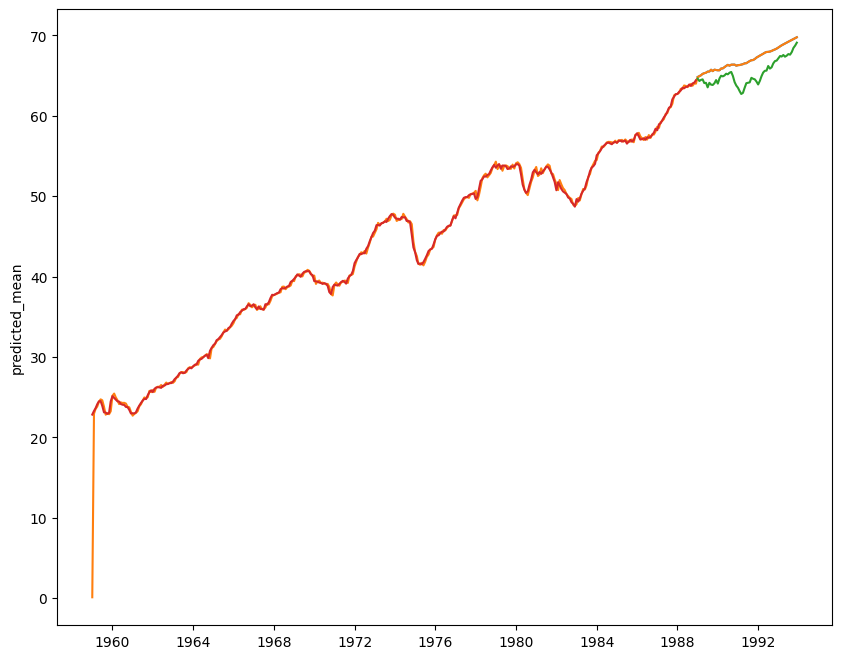

In [688]:
plt.figure(figsize=(10,8))
model = ARIMA(indexed, order=(1, 1, 50), trend='t').fit(method_kwargs={'maxiter': 100})
y_pred = model.predict(start=test_dates[0], end=test_dates[-1])
sns.lineplot(y_pred)
sns.lineplot(model.predict(start=dates[0], end=dates[-1]))
plt.plot(test_df['Date'], test_df['Value'])
plt.plot(train_df['Date'], train_df['Value'])
print(r2_score(y_pred, test_df['Value']))

Хотя r2_score и "страдает", но видно близость модели к данным

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


0.08038988825754256


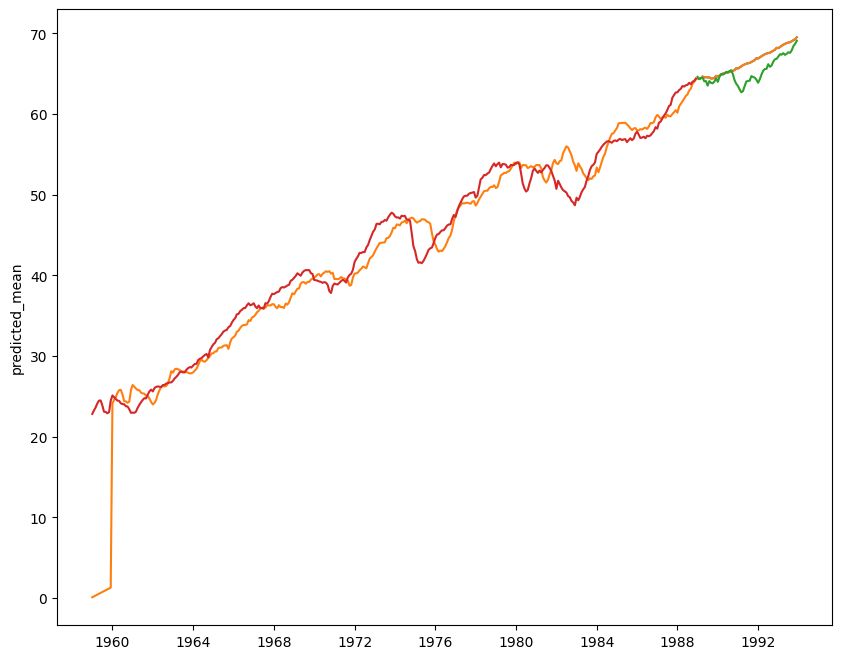

In [693]:
plt.figure(figsize=(10,8))
model = ARIMA(indexed, seasonal_order=(1, 1, 3, 12), trend='t').fit(method_kwargs={'maxiter': 100})
y_pred = model.predict(start=test_dates[0], end=test_dates[-1])
sns.lineplot(y_pred)
sns.lineplot(model.predict(start=dates[0], end=dates[-1]))
plt.plot(test_df['Date'], test_df['Value'])
plt.plot(train_df['Date'], train_df['Value'])
print(r2_score(y_pred, test_df['Value']))

<h2> Красота. Уже куда лучше

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum L

0.34135829266642936


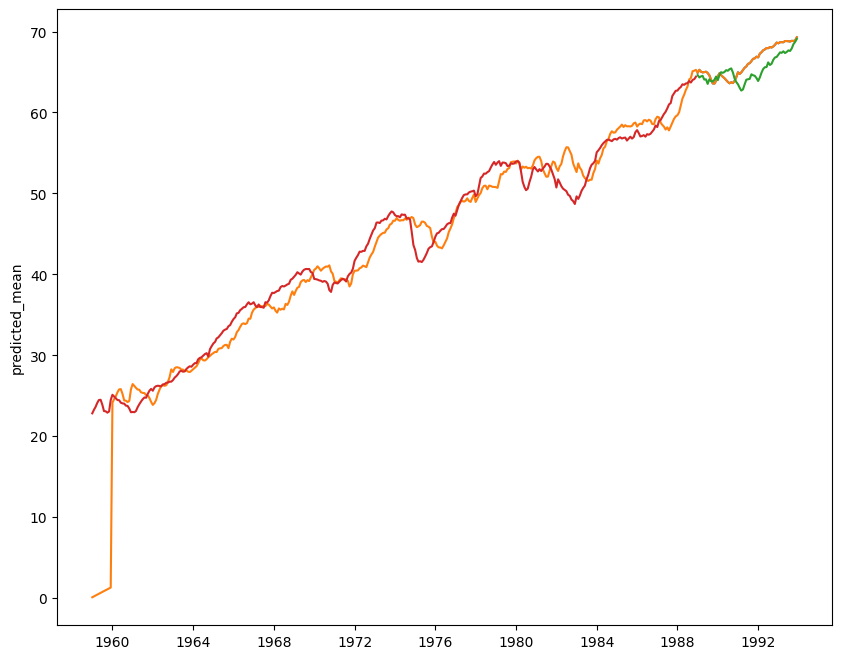

In [694]:
plt.figure(figsize=(10,8))
model = ARIMA(indexed, seasonal_order=(1, 1, 10, 12), trend='t').fit(method_kwargs={'maxiter': 100})
y_pred = model.predict(start=test_dates[0], end=test_dates[-1])
sns.lineplot(y_pred)
sns.lineplot(model.predict(start=dates[0], end=dates[-1]))
plt.plot(test_df['Date'], test_df['Value'])
plt.plot(train_df['Date'], train_df['Value'])
print(r2_score(y_pred, test_df['Value']))

Подобрать параметры по сетке выйдет затратно. Код выше выполнялся **8 минут**. Кажется, это задача для более мощного компьютера... а может, и целого кластера. А может, и суперкомпьютера :)
r2_score в 0.34 можно считать удовлетворительным.